In [67]:
import pandas as pd

path = r'C:\Users\shreyansh verma\Documents\VS Code Projects\Machine Learning\Practice\Iris Flower\Iris Flower Dataset zip\IRIS.csv'
data = pd.read_csv(path)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X= pd.DataFrame(data)
y= data.species
X= X.drop('species',axis=1)
y=pd.get_dummies(y)

X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                  train_size= 0.8,
                                                  test_size= 0.2)

iris_model = XGBClassifier(n_estimators= 500, random_state= 1)
iris_model.fit(X_train,y_train,
               early_stopping_rounds= 5,
               eval_set = [(X_val,y_val)],
               verbose= False)
iris_preds= iris_model.predict(X_val)
mean_absolute_error(y_val,iris_preds)

c:\Users\shreyansh verma\Documents\VS Code Projects\env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


0.044444444444444446

<Axes: title={'center': 'Iris Prediction Model'}>

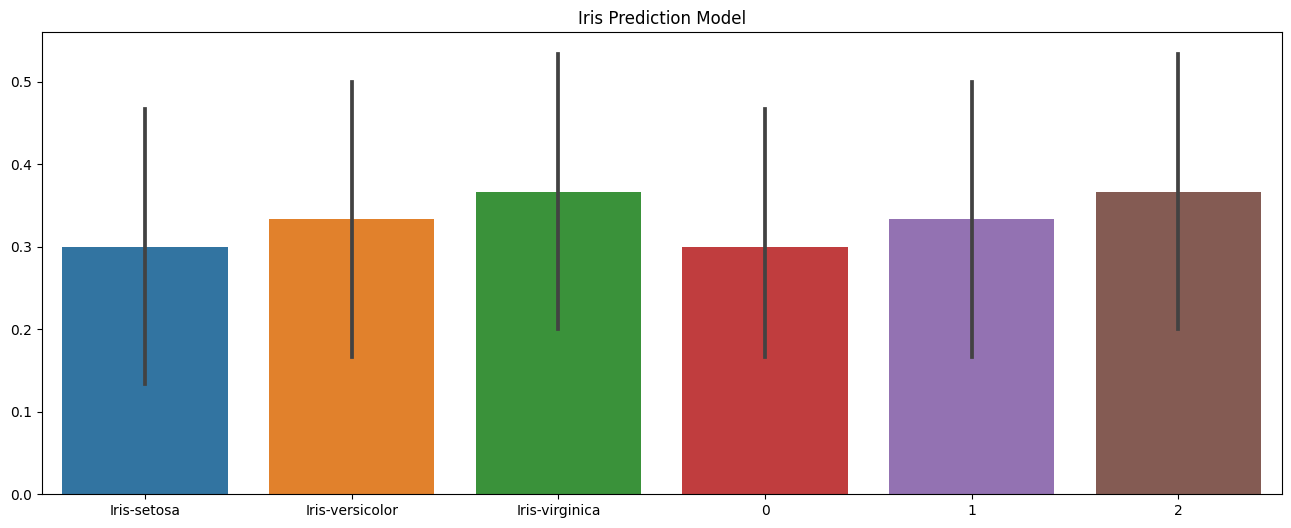

In [87]:
plt_y_val= pd.DataFrame(y_val).reset_index(drop=True)
plt_preds= pd.DataFrame(iris_preds).reset_index(drop=True)
plt_data = pd.concat([plt_y_val,plt_preds],axis= 'columns')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(16,6))
plt.title('Iris Prediction Model')
sns.barplot(data = plt_data)
